# Prog officiel : Représenter, à l’aide d’un langage de programmation, la somme de deux signaux sinusoïdaux périodiques synchrones en faisant varier la phase à l'origine de l'un des deux.

Amplitude d'un signal sinusoïdal au cours du temps :


$y(t) = A \times \cos \left(2\pi \dfrac{t}{T} + \phi \right) $


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
Pi = np.pi

### Somme de 2 signaux sinusoïdaux et influence du déphasage :
Modifier la valeur de $phi$ pour observer l'influence sur la représentation du signal.

<IPython.core.display.Javascript object>


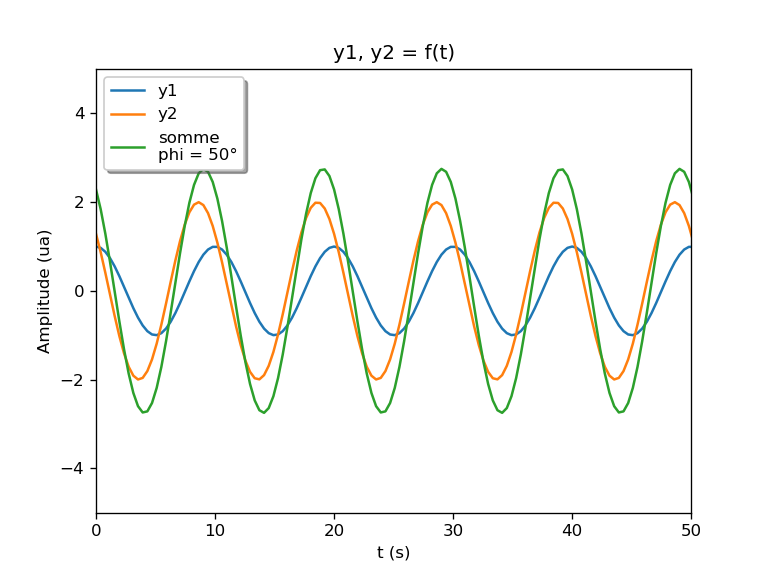

In [9]:
phi = 50 # phase à l'origine
phi_rad = np.radians(phi) # conversion en radians

A1 = 1 # amplitude en unité arbitraire (ua)
A2 = 2 # amplitude en unité arbitraire (ua)
T = 10 # période en s

# création des instants
t = np.linspace(0, 10*T, 256) # 256 instants répartis de t=0 à t=10T

# calcul de l'amplitude 
y1 = A1*np.cos(2*Pi*t/T)
y2 = A2*np.cos(2*Pi*t/T + phi_rad)

# bornes des axes du graphiques
plt.xlim(0, 50)
plt.ylim(-5, 5)

# graphique
plt.plot(t, y1, label=f'y1')
plt.plot(t, y2, label=f'y2')
plt.plot(t, y1+y2, label=f'somme\nphi = {phi}°')
plt.legend(loc="upper left", shadow=True)
plt.ylabel('Amplitude (ua)')
plt.xlabel('t (s)')
plt.title('y1, y2 = f(t)')
plt.show()

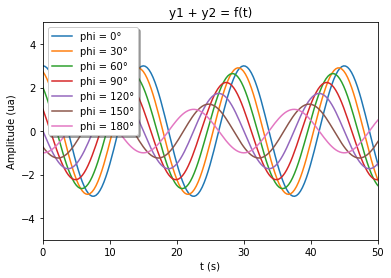

In [4]:
A1 = 1 # amplitude en unité arbitraire (ua)
A2 = 2 # amplitude en unité arbitraire (ua)
T = 15 # période en s

# création des instants
t = np.linspace(0, 10*T, 512) # 256 instants répartis de t=0 à t=10T

y1 = A1*np.cos(2*Pi*t/T)

for phi in range(0, 181, 30):
    phi_rad = np.radians(phi) # conversion en radians

    # calcul de l'amplitude 
    y2 = A2*np.cos(2*Pi*t/T + phi_rad)

    # graphique
    plt.plot(t, y1+y2, label=f'phi = {phi}°')
    
# bornes des axes du graphiques (il faut fixer les bornes pour voir l'influence d'un changement de A ou T)
plt.xlim(0, 50)
plt.ylim(-5, 5)
    
plt.legend(loc="upper left", shadow=True)
plt.ylabel('Amplitude (ua)')
plt.xlabel('t (s)')
plt.title('y1 + y2 = f(t)')
plt.show()

## Utilisation de widgets de contrôles (nettement plus compliqué !)

In [10]:
# librairie complémentaire pour les widgets
import matplotlib.widgets as mpw 

<IPython.core.display.Javascript object>


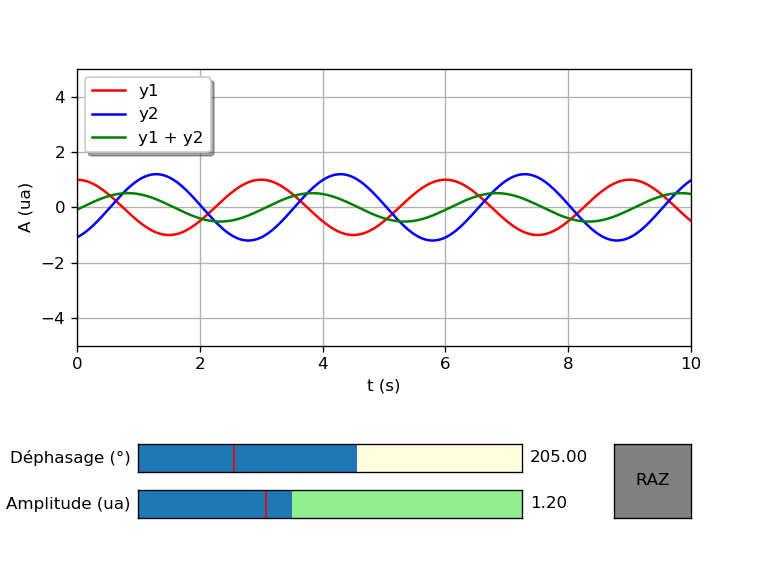

In [11]:
# backend permettant l'interactivité
%matplotlib notebook

fig, ax = plt.subplots()
plt.xlabel('t (s)')
plt.ylabel('A (ua)')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.4) # positionnement de la zone graphique pour laisser de l'espace aux widgets

T = 3 # période en s
tmax = 10 # graphique sur 10 s max
t = np.linspace(0, tmax, 256)
A1 = 1 # amplitude en ua
phi = np.radians(90)
y1 = A1*np.cos(2*Pi*t/T)
A2 = 1
y2 = A2*np.cos(2*Pi*t/T+phi)
y_tot = y1 + y2

(courbe1, ) = plt.plot(t, y1, color='red', label='y1') # conserve la référence de la courbe (Artist)
(courbe2, ) = plt.plot(t, y2, color='blue', label='y2') # conserve la référence de la courbe (Artist)
(courbe_tot, ) = plt.plot(t, y_tot, color='green', label='y1 + y2') # conserve la référence de la courbe (Artist)
plt.legend(loc="upper left", shadow=True)
plt.axis(xmin=0, xmax=10, ymin=-5, ymax=5) # plages des abscisses et ordonnées

# définition des 'axes' pour contenir les widgets
ax_A = plt.axes([0.18, 0.1, 0.5, 0.05], facecolor='lightgreen')
ax_phi = plt.axes([0.18, 0.18, 0.5, 0.05], facecolor='lightyellow')

# création des widgets
slider_phi = mpw.Slider(ax_phi, 'Déphasage (°)', 0, 360, valinit=90, valstep=5)
slider_A = mpw.Slider(ax_A, 'Amplitude (ua)', 0, 3, valinit=1, valstep=.2)

def maj(val):
    A2 = slider_A.val
    phi = slider_phi.val
    phi = np.radians(phi)
    courbe2.set_ydata(A2*np.cos(2*Pi*t/T+phi)) # maj des données de la courbe
    courbe_tot.set_ydata(A2*np.cos(2*Pi*t/T+phi)+y1) # maj des données de la courbe
    fig.canvas.draw_idle() # maj du tracé de la courbe

# action à effectuer lors de l'utilisation des widgets    
slider_phi.on_changed(maj)
slider_A.on_changed(maj)

# on ajoute un bouton de Remise à zéro (RAZ) des paramètres
ax_RAZ = plt.axes([0.8, 0.1, 0.1, 0.13])
button_RAZ = mpw.Button(ax_RAZ, 'RAZ', color='gray', hovercolor='0.777')

def raz(event):
    slider_A.reset()
    slider_phi.reset()
    
button_RAZ.on_clicked(raz)

plt.show()